In [5]:
library(dplyr)
library(ggplot2)

In [3]:
############## Load expression data (single-cell)

In [4]:
# Seurat object
mydir = "/share/ScratchGeneral/anncuo/OneK1K/"
sce_filename = paste0(mydir,"cell_type.RDS")

In [26]:
sce = readRDS(sce_filename)
sce

Loading required package: Seurat

Attaching SeuratObject



An object of class Seurat 
57641 features across 1272489 samples within 2 assays 
Active assay: SCT (24903 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [18]:
######## make input files
input_files_dir = paste0(mydir,"input_files_CellRegMap/")

In [4]:
####### make sample mapping file (smf)

In [27]:
## Metadata
metadata_filename =  paste0(mydir,"/metadata.RDS")
df = readRDS(metadata_filename)

In [28]:
### B cell only SMF
B_cell_types = unique(as.character(df$cell_type))[grep("B cell", unique(as.character(df$cell_type)))]
B_cell_types

[1] "TCL1A+ FCER2+ B cell" "TCL1A- FCER2- B cell" "IgJ+ B cell"

In [29]:
df_B = df[df$cell_type %in% B_cell_types,]
nrow(df_B)
head(df_B,2)

[1] 133716

,orig.ident,nCount_RNA,nFeature_RNA,pool,individual,percent.mt,latent,nCount_SCT,nFeature_SCT,cell_type,predicted.celltype.l1.score,predicted.celltype.l1,predicted.celltype.l2.score,predicted.celltype.l2
,<fct>,<dbl>,<int>,<fct>,<chr>,<dbl>,<fct>,<dbl>,<int>,<fct>,<dbl>,<chr>,<dbl>,<chr>
AAACCTGCAACGATCT-1,onek1k,3847,884,pool_1,686_687,3.717182,b1,3756,883,TCL1A+ FCER2+ B cell,1,B,0.8730781,B naive
AAACCTGGTCAGAATA-1,onek1k,4028,1097,pool_1,692_693,3.202582,b1,3811,1095,TCL1A- FCER2- B cell,1,B,0.9379463,B intermediate


In [8]:
# retain only second part of individual ID (samples sequenced twice)
smf_df = data.frame(phenotype_sample_id = rownames(df_B), 
                    genotype_individual_id = gsub(".*_","",df_B$individual),
                   individual_long = df_B$individual)
head(smf_df)

,phenotype_sample_id,genotype_individual_id,individual_long
,<chr>,<chr>,<chr>
1,AAACCTGCAACGATCT-1,687,686_687
2,AAACCTGGTCAGAATA-1,693,692_693
3,AAACGGGAGCGTCAAG-1,693,692_693
4,AAACGGGAGGGAACGG-1,691,690_691
5,AAACGGGCAGTTCATG-1,683,682_683
6,AAACGGGGTCCCTACT-1,693,692_693


In [9]:
smf_filename = paste0(input_files_dir,"smf_Bcells.csv")
smf_filename

[1] "/share/ScratchGeneral/anncuo/OneK1K/input_files_CellRegMap/smf_Bcells.csv"

In [10]:
# write.csv(smf_df, smf_filename)

In [ ]:
##################################################
##### cell contexts (B-cells only)

In [30]:
B_cells = colnames(sce)[colnames(sce) %in% rownames(df_B)]
length(B_cells)
head(B_cells)

[1] 133716

[1] "AAACCTGCAACGATCT-1" "AAACCTGGTCAGAATA-1" "AAACGGGAGCGTCAAG-1"
[4] "AAACGGGAGGGAACGG-1" "AAACGGGCAGTTCATG-1" "AAACGGGGTCCCTACT-1"

In [31]:
sce_B = sce[,colnames(sce) %in% B_cells]
sce_B

An object of class Seurat 
57641 features across 133716 samples within 2 assays 
Active assay: SCT (24903 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [32]:
# this would probably be faster in python / hail
sce_B = RunPCA(sce_B)

PC_ 1 
Positive:  S100A9, GNLY, S100A8, NKG7, LYZ, CCL5, TYROBP, TMSB4X, S100A4, KLRB1 
	   IL32, CST3, CST7, GZMB, GZMA, FGFBP2, FCER1G, GZMH, CTSW, CCL4 
	   CD7, CMC1, CD3D, LST1, HCST, ID2, AIF1, ANXA1, PRF1, IFITM2 
Negative:  IGJ, IGLL5, MZB1, AL928768.3, TNFRSF17, DERL3, ITM2C, CD74, CD79A, HLA-DRA 
	   HSP90B1, SEC11C, PPIB, UBE2J1, SUB1, HRASLS2, RP5-887A10.1, PDIA4, C19orf10, TNFRSF13B 
	   SSR4, HLA-DRB1, GNG7, EAF2, HLA-DPA1, CD79B, CD38, FKBP11, SSR3, HLA-DPB1 
PC_ 2 
Positive:  CD74, HLA-DRA, CD79A, HLA-DPB1, HLA-DRB1, HLA-DPA1, MS4A1, CD79B, HLA-DQB1, TCL1A 
	   HLA-DQA1, LINC00926, HLA-DRB5, FCER2, VPREB3, CD37, MEF2C, BANK1, HLA-DMB, HLA-DMA 
	   RP5-887A10.1, CD22, HLA-DQA2, MARCH1, AC079767.4, ADAM28, BLK, ARHGAP24, FCRLA, RALGPS2 
Negative:  IGJ, MZB1, GNLY, S100A9, NKG7, S100A8, LYZ, CCL5, TNFRSF17, S100A4 
	   B2M, TYROBP, KLRB1, IL32, CST3, GZMB, TMSB4X, CST7, DERL3, S100A6 
	   GZMA, FGFBP2, GZMH, FCER1G, HCST, SRGN, LGALS1, HSP90B1, PPIB, CTSW 
PC_ 3 
Positive:

In [33]:
pca_df = as.data.frame(Embeddings(sce_B, reduction = "pca"))
dim(pca_df)
head(pca_df)

[1] 133716     50

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,⋯,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AAACCTGCAACGATCT-1,-8.365451,37.37888,6.428241,-6.346134,0.5858396,-2.128907,-13.632327,0.2608487,0.2673149,2.9286441,⋯,-5.5247553,-3.088004,2.2084527,-2.134242,0.4651502,2.27826183,-1.1948226,-1.6363839,-2.4752750,0.7392352
AAACCTGGTCAGAATA-1,-6.780911,21.71108,5.399231,7.456284,1.7131647,-2.394548,3.401079,-3.2949332,0.3971382,-0.8232639,⋯,-1.0628264,1.165949,1.1071554,-2.283348,-1.2960931,0.37993600,-2.6392310,-1.7880141,4.9483906,-0.9002009
AAACGGGAGCGTCAAG-1,-4.996049,18.55316,4.043300,-1.552193,-3.3303450,-6.025308,5.361336,0.3776481,0.6792948,-0.7601260,⋯,0.4058873,0.782195,0.7774697,1.657701,-0.2467452,0.06755345,-0.7039412,-0.9183164,-1.3636803,0.1534562
AAACGGGAGGGAACGG-1,-23.295689,18.71502,-35.236922,1.819990,-2.3940423,-6.380178,8.391907,-6.0292755,1.0021937,0.2031033,⋯,3.7521002,-6.697789,-2.3535976,4.372498,1.2769060,0.01912454,-1.1609495,4.1179613,0.3032618,-0.1597751
AAACGGGCAGTTCATG-1,-7.176615,36.08010,5.896488,-5.268415,-0.4560017,-3.741812,-8.398654,-0.7603151,0.3821137,0.1390281,⋯,2.1868642,-2.707042,8.0915022,8.910144,1.2258139,1.04565611,3.1869747,2.8416511,-2.5688610,-10.6963824
AAACGGGGTCCCTACT-1,-17.383279,28.23294,5.408477,-9.093957,1.7323966,-2.863634,-14.117196,1.6589523,-1.9243865,-1.0512089,⋯,0.4206040,-2.007749,-1.9894950,1.090933,0.3945304,0.45010529,-0.4163578,-0.3747127,0.4087624,0.9602518


In [24]:
pca_df$cell = rownames(pca_df)
df$cell = rownames(df)
df_to_plot = inner_join(pca_df, df, by = "cell")

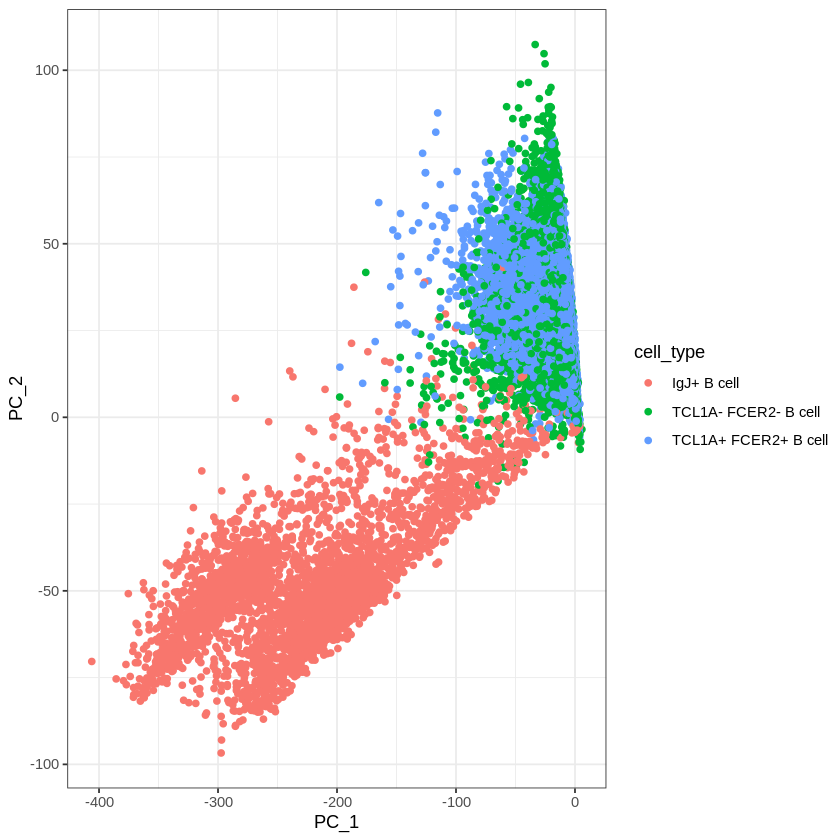

In [25]:
ggplot(df_to_plot, aes(x=PC_1, y = PC_2, colour = cell_type)) + geom_point() + theme_bw()

In [27]:
df_colours = read.csv(paste0(mydir,"celltype_colours.csv"), row.names=1)
head(df_colours)

,cell_type,colours
,<chr>,<chr>
1,CD4+ KLRB1- T cell,#882E72
2,CD4+ KLRB1+ T cell,#B178A6
3,CD4+ SOX4+ T cell,#D6C1DE
4,CD8+ GNLY+ NKG7+ T cell,#1965B0
5,CD8+ LTB+ T cell,#5289C7
6,CD8+ S100B+ T cell,#7BAFDE


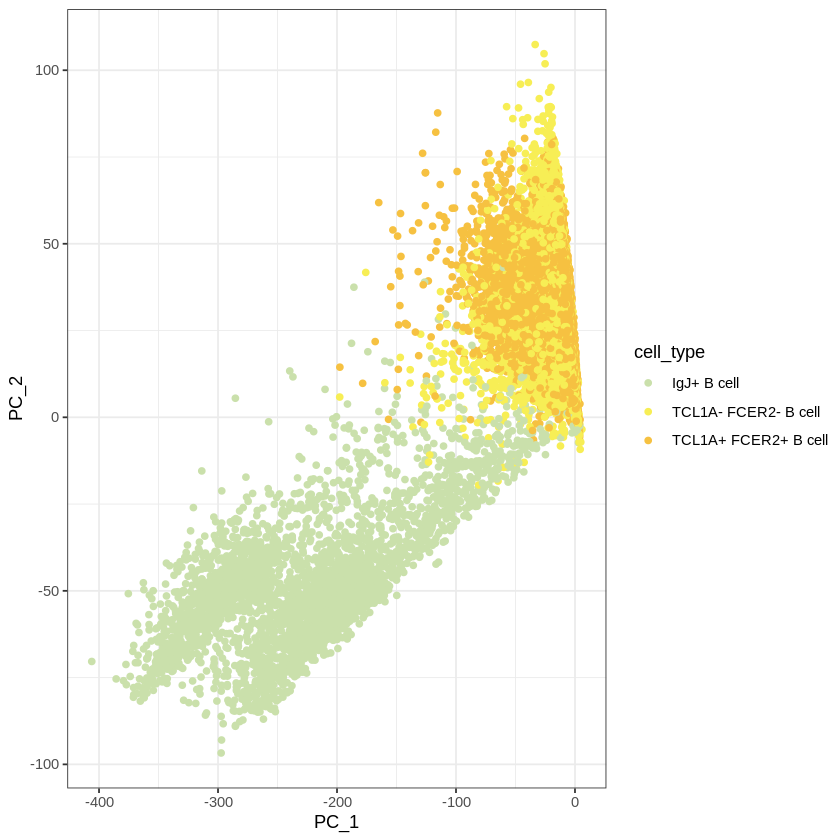

In [32]:
ggplot(df_to_plot, aes(x=PC_1, y = PC_2, colour = cell_type)) + geom_point() + theme_bw() +
    scale_colour_manual(values = df_colours[grep("B cell",df_colours$cell_type),]$colours) 

In [ ]:
sce_B = RunUMAP(sce_B, reduction = "pca", dims = 1:50)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
10:27:33 UMAP embedding parameters a = 0.9922 b = 1.112

10:27:34 Read 133716 rows and found 50 numeric columns

10:27:34 Using Annoy for neighbor search, n_neighbors = 30

10:27:34 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:28:00 Writing NN index file to temp file /tmp/Rtmp87yzEu/file208170989c9

10:28:00 Searching Annoy index using 1 thread, search_k = 3000



In [ ]:
umap_df = as.data.frame(Embeddings(sce_B, reduction = "umap"))
dim(umap_df)
head(umap_df)

In [ ]:
umap_df$cell = rownames(umap_df)
df_to_plot0 = inner_join(umap_df, df, by = "cell")

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 6) 
ggplot(df_to_plot0, aes(x=UMAP_1, y = UMAP_2, colour = cell_type)) + geom_point() + theme_bw() +
    scale_colour_manual(values = df_colours[grep("B cell",df_colours$cell_type),]$colours)

In [33]:
# df_celltypes = read.csv(paste0(mydir,"celltype_names.csv"), row.names=1)
# df_celltypes

In [34]:
C_filename = paste0(input_files_dir,"PCs_Bcells.csv")
C_filename

[1] "/share/ScratchGeneral/anncuo/OneK1K/input_files_CellRegMap/PCs_Bcells.csv"

In [35]:
write.csv(pca_df, C_filename)

In [ ]:
##################################################
##### feature-variant filter file (B-cells only)

In [6]:
## eQTL results
results_filename =  paste0(mydir,"OneK1K_eQTLs_Results_03022021.tsv")
eqtl_df = read.csv(results_filename, sep="\t")
head(eqtl_df)

,cell_type,GeneID,Gene_EnsemblID,rsID,Chromosome,Position,SNP_assessed_allele,eSNP_rank,rho_correlation_coefficient,S.statistics,pvalue,qvalue,FDR
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,B IN,RP11-298J20.3,ENSG00000226899,rs4962711,10,126644482,C,eSNP1,-0.473,232418782,8.653e-56,5.108e-50,2.164e-05
2,B IN,PPA1,ENSG00000180817,rs12355080,10,71963608,A,eSNP1,0.428,90338126,6.308e-45,1.646e-40,2.164e-05
3,B IN,GDI2,ENSG00000057608,rs3736461,10,5855403,C,eSNP1,-0.278,201715943,6.764e-19,6.078e-15,2.164e-05
4,B IN,OPTN,ENSG00000123240,rs57057378,10,13160035,A,eSNP1,-0.258,198494721,2.342e-16,2.032e-12,2.164e-05
5,B IN,MGMT,ENSG00000170430,rs12254582,10,131279791,G,eSNP1,-0.220,192526141,3.259e-12,2.150e-08,2.164e-05
6,B IN,VDAC2,ENSG00000165637,rs11543,10,76970613,C,eSNP1,-0.219,192405014,3.889e-12,2.546e-08,2.164e-05


In [14]:
Bcell_eqtls = eqtl_df[grep("B ",eqtl_df$cell_type),]
nrow(Bcell_eqtls)
head(Bcell_eqtls,2)

[1] 3264

,cell_type,GeneID,Gene_EnsemblID,rsID,Chromosome,Position,SNP_assessed_allele,eSNP_rank,rho_correlation_coefficient,S.statistics,pvalue,qvalue,FDR
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,B IN,RP11-298J20.3,ENSG00000226899,rs4962711,10,126644482,C,eSNP1,-0.473,232418782,8.653e-56,5.108e-50,2.164e-05
2,B IN,PPA1,ENSG00000180817,rs12355080,10,71963608,A,eSNP1,0.428,90338126,6.308e-45,1.646e-40,2.164e-05


In [15]:
unique(Bcell_eqtls$cell_type)

[1] "B IN"  "B Mem"

In [21]:
Bcell_eqtls$chrom = Bcell_eqtls$Chromosome
Bcell_eqtls$feature = Bcell_eqtls$GeneID
Bcell_eqtls$snp_id = paste0(Bcell_eqtls$chrom,":",Bcell_eqtls$Position)

In [22]:
fvf_df = Bcell_eqtls[,c("feature","snp_id","chrom")]
head(fvf_df)

,feature,snp_id,chrom
,<chr>,<chr>,<int>
1,RP11-298J20.3,10:126644482,10
2,PPA1,10:71963608,10
3,GDI2,10:5855403,10
4,OPTN,10:13160035,10
5,MGMT,10:131279791,10
6,VDAC2,10:76970613,10


In [23]:
fvf_filename = paste0(input_files_dir,"fvf_Bcell_eqtls.csv")
fvf_filename

[1] "/share/ScratchGeneral/anncuo/OneK1K/input_files_CellRegMap/fvf_Bcell_eqtls.csv"

In [24]:
write.csv(fvf_df, fvf_filename)